# 固有値
https://qiita.com/kenmatsu4/items/2a8573e3c878fc2da306

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation as ani
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

行列Aでベクトル(1,1)を変換。変換後が赤線
$$
    Ax = \lambda x
$$

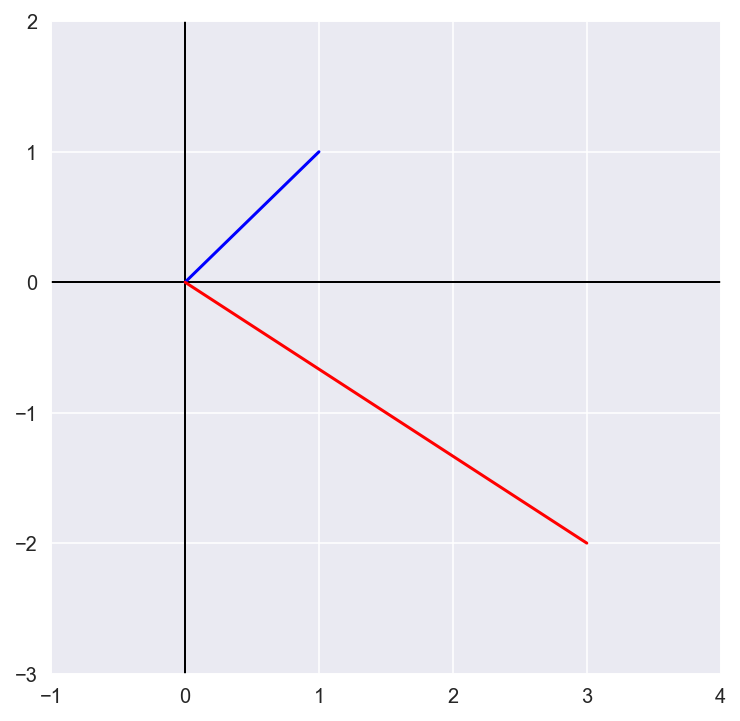

In [5]:
plt.figure(figsize=(6,6))
n = 20

A = [[2, 1],
     [-0.5, -1.5]]
x = [1, 1]

a = np.dot(A, x) # 内積

plt.plot([0, x[0]], [0, x[1]], 'b', zorder=100)
plt.plot([0, a[0]], [0, a[1]], 'r', zorder=100)

plt.plot([-15,50],[0,0],"k", linewidth=1)
plt.plot([0,0],[-40,40],"k", linewidth=1)
plt.xlim(-1,4)
plt.ylim(-3,2)
plt.show()

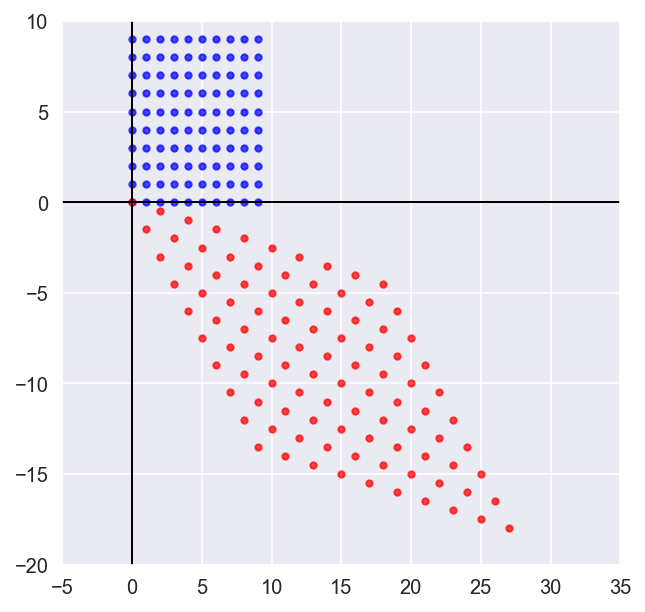

In [8]:
plt.figure(figsize=(5,5))
n = 10
xmin = -5
xmax = 35
ymin = -20
ymax = 10

A = [[2, 1],
     [-0.5, -1.5]]

for i in range(n):
    for j in range(n):
        x = j
        y = i
        
        a = np.dot(A, [x, y])
        
        plt.scatter(x, y, facecolor='b', alpha=.7, s=10)
        plt.scatter(a[0], a[1], facecolor='r', alpha=.7, s=10)
        
        plt.plot([xmin, xmax], [0,0], 'k', linewidth=1)
        plt.plot([0,0], [ymin, ymax], 'k', linewidth=1)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
plt.show()

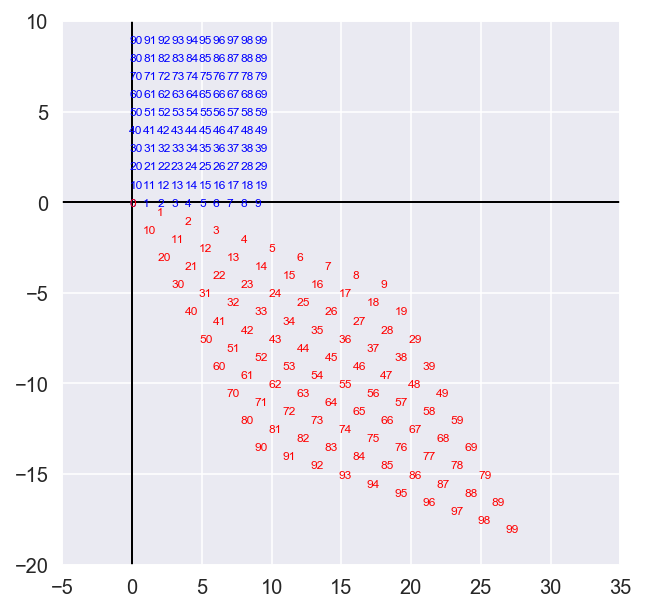

In [15]:
plt.figure(figsize=(5,5))
n=10
xmin = -5
xmax =  35
ymin = -20
ymax =  10

A = [[ 2, 1],
     [-0.5,-1.5]]
for i in range(n):
    for j in range(n):
        x=j
        y=i

        a = np.dot(A, [x, y])

        loc_adjust = .2  # 表示位置の調整
        plt.text(x-loc_adjust, y-loc_adjust, "%d"%(i*n + j),
                 color="blue", fontsize=6)
        plt.text(a[0]-loc_adjust, a[1]-loc_adjust,
                 "%d"%(i*n + j), color="red", fontsize=6)

        plt.plot([xmin,xmax],[0,0],"k", linewidth=1)
        plt.plot([0,0],[ymin,ymax],"k", linewidth=1)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
plt.show()

固有値、固有ベクトルは numpy 使って

In [18]:
la, v = np.linalg.eig(A)
print('lambda = ', la)
print('vector = ', v)

lambda =  [ 1.85078106 -1.35078106]
vector =  [[ 0.98904939 -0.28597431]
 [-0.1475849   0.95823729]]


## 固有値、固有ベクトルを使って、PCA（主成分分析）

S =  [[2.6774093  1.93221432]
 [1.93221432 3.05844013]]
lambda =  [0.92634075 4.80950869]
vectors =  [[-0.74098708 -0.67151928]
 [ 0.67151928 -0.74098708]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


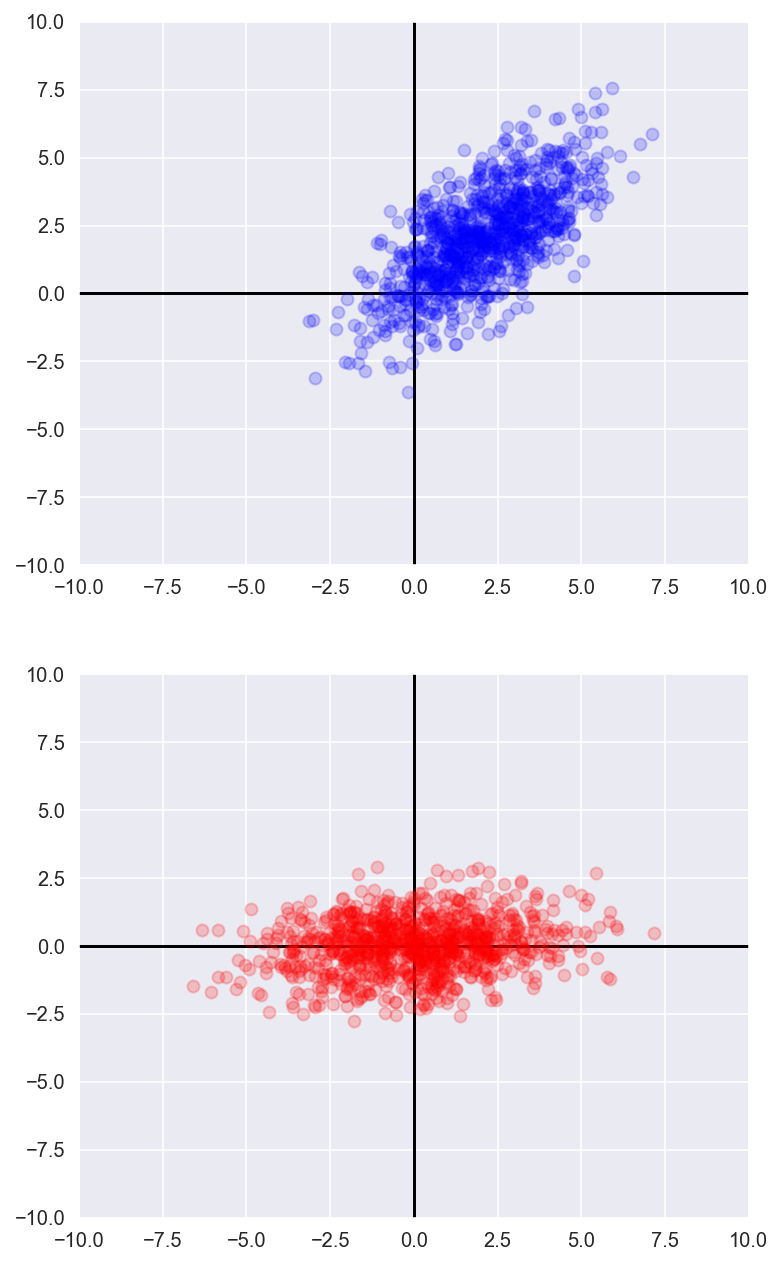

In [26]:
np.random.seed(0)
xmin, xmax, ymin, ymax = -10, 10, -10, 10

# 平均
mean = [2, 2]
# 共分散
cov = [[3, 2.3],
       [1.8, 3]]

# 2変量正規分布の乱数生成
x, y = np.random.multivariate_normal(mean, cov, 1000).T

av_x = np.average(x)
av_y = np.average(y)

# 分散共分散行列をデータより算出
S = np.cov(x, y)
print("S = ", S)

# 固有値、固有ベクトルを算出
la, v = np.linalg.eig(S)

print('lambda = ', la)
print('vectors = ', v)

# 原点が中心になるようスライドさせる
x2 = x - av_x
y2 = y - av_y

# 原点をスライドしたデータに、固有ベクトルを並べて作った行列をかける
a1 = np.array([np.dot(v, [x2[i], y2[i]]) for i in range(len(x))])

# グラフの描画
fig, ax = plt.subplots(2, 1, figsize=(6, 11))
ax[0].scatter(x, y, alpha=0.2, zorder=100, c='blue')
ax[0].set_xlim(xmin, xmax)
ax[0].set_ylim(ymin, ymax)
ax[0].plot([0, 0], [ymin, ymax], 'k')
ax[0].plot([xmin, xmax], [0, 0], 'k')

ax[1].scatter(a1[:,0], a1[:,1], c='r', alpha=0.2, zorder=100)
ax[1].set_xlim(xmin, xmax)
ax[1].set_ylim(ymin, ymax)
ax[1].plot([0, 0], [ymin, ymax], 'k')
ax[1].plot([xmin, xmax], [0, 0], 'k')